# Partie 1 - Base de données, Analyse, Prétraitement et Préparation

Appliquez les traitements nécessaires pour préparer la DataSet en utilisant Numpy et Pandas, (vous pouvez trouver un référentiel sur ressource) (présenter votre pipeline dans le compte rendu). NB. Le résultat de classification dépond essentiellement de la qualité du prétraitement.

## 1) Importation des bibliothèques

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2) Visualisation des données 

In [16]:
dataset = pd.read_csv("combined_csv.csv")
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,n,e,a,b,v,t,Y,',1,3,C


## 3) Pré-traitement des données

Notre jeu de données comporte plusieurs erreurs. Premièrement, il comporte des NaN, c'est-à-dire des valeurs manquantes. Deuxièmement, il comporte des valeurs erronées, qui ne correspondent pas aux valeurs acceptées en entrée par le questionnaire. Il faut donc les remplacer. 

### 3.1) Traitement des valeurs manquantes NaN

In [17]:
dataset.isnull().sum()

Q1                 8
Q2                12
Q3                13
Q4                 9
Q5                14
Q6                12
Q7                10
Q8                12
Q9                10
Q10                8
Score              0
Interpretation     0
dtype: int64

On observe plusieurs valeurs manquantes. On peut soit les remplacer par des valeurs nulles (b où 2), où utiliser la fonction "mode" de pandas. Celle-ci va rendre compte des valeurs les plus rendondantes dans chaque colonne du dataset.

In [18]:
dataset.mode().iloc[0]

Q1                a
Q2                b
Q3                c
Q4                a
Q5                a
Q6                2
Q7                3
Q8                2
Q9                1
Q10               2
Score             8
Interpretation    C
Name: 0, dtype: object

On remplace les NaN par les données explicitées ci-dessus.

In [19]:
dataset.fillna(dataset.mode().iloc[0], inplace=True)
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,c,c,c,2,3,3.0,3,3,14,B
211,b,a,c,a,b,2,2.0,2,3,2,5,C
212,a,c,b,a,a,1.0,3,3.0,2,3,8,C
213,a,n,e,a,b,v,t,Y,',1,3,C


On vérifie qu'il ne nous reste plus de valeurs manquantes NaN.

In [20]:
dataset.isnull().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Score             0
Interpretation    0
dtype: int64

### 3.2) Traitement des valeurs erronées

Notre hypothèse de travail sera la suivante: <br/>
1) On va devoir séparer les valeurs de notre jeu de données en deux: True et False. <br/>
2) Ensuite, on remplace l'une des deux valeurs (qui représente les valeurs erronnées) par un NaN. <br/>
3) Enfin, on applique la solution effectuée à la question précédente, pour remplacer les NaN par les valeurs de la fonction .mode() <br/>

#### 3.2.1) Remplacement des valeurs par True et False

On va devoir remplacer toutes les valeurs qui ne correspondent pas à a, b, c ou 1,2 et 3.

In [21]:
dataset.iloc[:, 0:10].isin(["a", "b", "c", "1", "2", "3"])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
210,True,True,True,True,True,True,True,False,True,True
211,True,True,True,True,True,True,False,True,True,True
212,True,True,True,True,True,False,True,False,True,True
213,True,False,False,True,True,False,False,False,False,True


#### 3.2.2) Remplacement des valeurs erronnées par des NaN

On écrase notre dataset originel par le nouveau dataset dans lequel les valeurs erronées sont remplacées par des NaN. 

In [22]:
dataset.iloc[:, 0:10] = dataset.iloc[:, 0:10].where(dataset.iloc[:, 0:10].isin(["a", "b", "c", "1", "2", "3"]))
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,c,c,c,2,3,NaN,3,3,14,B
211,b,a,c,a,b,2,NaN,2,3,2,5,C
212,a,c,b,a,a,NaN,3,NaN,2,3,8,C
213,a,NaN,NaN,a,b,NaN,NaN,NaN,NaN,1,3,C


In [23]:
# On remplace les a/A par des 1
dataset = dataset.replace("a", 1)
dataset= dataset.replace("A", 1)

# On remplace les b/B par des 2
dataset = dataset.replace("b", 2)
dataset = dataset.replace("B", 2)

# On remplace les c/C par des 3
dataset = dataset.replace("c", 3)
dataset = dataset.replace("C", 3)

print(dataset)

      Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9 Q10  Score  Interpretation
0      1    1    1    1    1    1    1    1    1   1     10               2
1      2    2    2    2    2    2    2    2    2   2      0               3
2      3    3    3    3    3    3    3    3    3   3     20               1
3      1    2    3    1    2    1    2    3    1   2      8               3
4      2    3    1    3    1    3    2    3    1   2     11               2
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ..    ...             ...
210    3    3    3    3    3    2    3  NaN    3   3     14               2
211    2    1    3    1    2    2  NaN    2    3   2      5               3
212    1    3    2    1    1  NaN    3  NaN    2   3      8               3
213    1  NaN  NaN    1    2  NaN  NaN  NaN  NaN   1      3               3
214  NaN    2    3  NaN  NaN  NaN    2  NaN  NaN   3      4               3

[215 rows x 12 columns]


#### 3.2.3) Remplacement des NaN par la fonction .mode()

In [24]:
dataset.fillna(dataset.mode().iloc[0], inplace=True)
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,2
1,2,2,2,2,2,2,2,2,2,2,0,3
2,3,3,3,3,3,3,3,3,3,3,20,1
3,1,2,3,1,2,1,2,3,1,2,8,3
4,2,3,1,3,1,3,2,3,1,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,3,3,3,2,3,2,3,3,14,2
211,2,1,3,1,2,2,3,2,3,2,5,3
212,1,3,2,1,1,2,3,2,2,3,8,3
213,1,2,3,1,2,2,3,2,1,1,3,3


In [25]:
# # Conversion du df en int

df = dataset.astype("int")
  
print(df.dtypes)

Q1                int32
Q2                int32
Q3                int32
Q4                int32
Q5                int32
Q6                int32
Q7                int32
Q8                int32
Q9                int32
Q10               int32
Score             int32
Interpretation    int32
dtype: object


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Q1              215 non-null    int32
 1   Q2              215 non-null    int32
 2   Q3              215 non-null    int32
 3   Q4              215 non-null    int32
 4   Q5              215 non-null    int32
 5   Q6              215 non-null    int32
 6   Q7              215 non-null    int32
 7   Q8              215 non-null    int32
 8   Q9              215 non-null    int32
 9   Q10             215 non-null    int32
 10  Score           215 non-null    int32
 11  Interpretation  215 non-null    int32
dtypes: int32(12)
memory usage: 10.2 KB


In [27]:
# Suppression de la colonne "Score"

df = df.drop(['Score'], axis=1)

In [28]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,1,1,1,1,1,1,1,1,1,1,2
1,2,2,2,2,2,2,2,2,2,2,3
2,3,3,3,3,3,3,3,3,3,3,1
3,1,2,3,1,2,1,2,3,1,2,3
4,2,3,1,3,1,3,2,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,3,3,3,2,3,2,3,3,2
211,2,1,3,1,2,2,3,2,3,2,3
212,1,3,2,1,1,2,3,2,2,3,3
213,1,2,3,1,2,2,3,2,1,1,3


In [29]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,1,1,1,1,1,1,1,1,1,1,2
1,2,2,2,2,2,2,2,2,2,2,3
2,3,3,3,3,3,3,3,3,3,3,1
3,1,2,3,1,2,1,2,3,1,2,3
4,2,3,1,3,1,3,2,3,1,2,2


# Partie 2 - Développement et entraînement d’un modèle KNN

La technique de classification KNN est considérée comme la technique la plus simple pour appliquer la classification supervisée, tout simplement, une nouvelle donnée de test sera classée comme la majorité de ses voisins (la distance la plus proche). À la suite de votre recherche sur le principe de KNN, nous développons notre modèle KNN. Pour cela :

## 2.1) Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              215 non-null    object
 1   Q2              215 non-null    object
 2   Q3              215 non-null    object
 3   Q4              215 non-null    object
 4   Q5              215 non-null    object
 5   Q6              215 non-null    object
 6   Q7              215 non-null    object
 7   Q8              215 non-null    object
 8   Q9              215 non-null    object
 9   Q10             215 non-null    object
 10  Score           215 non-null    int64 
 11  Interpretation  215 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 20.3+ KB


In [31]:
dataset["Q1"].astype(int)

0      1
1      2
2      3
3      1
4      2
      ..
210    3
211    2
212    1
213    1
214    1
Name: Q1, Length: 215, dtype: int32

## Fractionnement du jeu de données

In [32]:
X = df.iloc[:,:-1]
y = df[['Interpretation']]

In [33]:
print(y)

     Interpretation
0                 2
1                 3
2                 1
3                 3
4                 2
..              ...
210               2
211               3
212               3
213               3
214               3

[215 rows x 1 columns]


In [34]:
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3,3,3
3,1,2,3,1,2,1,2,3,1,2
4,2,3,1,3,1,3,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...
210,3,3,3,3,3,2,3,2,3,3
211,2,1,3,1,2,2,3,2,3,2
212,1,3,2,1,1,2,3,2,2,3
213,1,2,3,1,2,2,3,2,1,1


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(172, 10)
(43, 10)
(172, 1)
(43, 1)


## Fonction KNN

In [37]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis



In [38]:

k = 5
metric = 'manhattan'

def knn(X_test, X_train, y_train, k, metric) :
    

    Resultat = []
    for j in range(0,len(X_test)): # pour toutes les valeurs de X_Test 
    
        D_T = X_test.iloc[j,:]

        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]
        
            #Dis = np.sqrt(np.sum((D_T-D_A)**2))
        
            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

        SS = np.sort(Distance)  
        S = np.argsort(Distance) # index par odre croissant 

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 1).astype(int)), np.sum((Pred == 2).astype(int)), np.sum((Pred == 3).astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'
        
        Resultat.append(Pred+1)
        
    return Resultat


y_pred=knn(X_test, X_train, y_train, 5, 'minkowski')
print(y_pred)

[2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3]


In [39]:
y_train.shape

(172, 1)

In [40]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("taux de précision :", accuracy_score(y_test, y_pred))
print("----------------------------------------------")
print(classification_report(y_test, y_pred))
print("----------------------------------------------")
print("Matrice de confusion:\n\n",confusion_matrix(y_test, y_pred))

taux de précision : 0.7209302325581395
----------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.54      0.54      0.54        13
           3       0.80      0.89      0.84        27

    accuracy                           0.72        43
   macro avg       0.45      0.48      0.46        43
weighted avg       0.67      0.72      0.69        43

----------------------------------------------
Matrice de confusion:

 [[ 0  3  0]
 [ 0  7  6]
 [ 0  3 24]]


<ipython-input-40-fe4d048bd450>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != np.array(y_test)))
    
#On affiche le résultat sous la forme d'un graphique

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Dégré d''erreur en fonction de la valeur de K')
plt.xlabel('K')
plt.ylabel('Erreur')
plt.grid()

NameError: name 'KNeighborsClassifier' is not defined

<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifie

<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-45-0542c91cb4ee>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifie

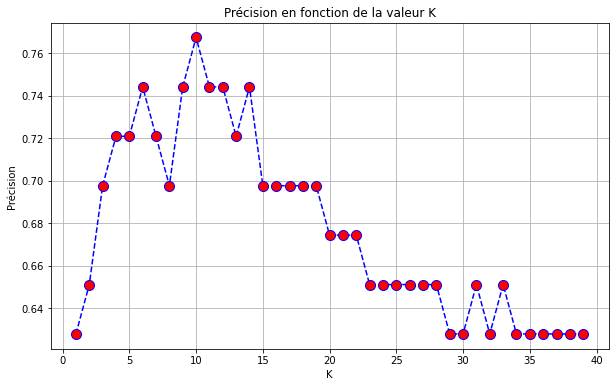

In [45]:
acc = []
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
#On affiche le résultat sous la forme d'un graphique 
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Précision en fonction de la valeur K')
plt.xlabel('K')
plt.ylabel('Précision')
plt.grid()

##  KNN avec SKlearn 


La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles. Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les données en jeu de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisation des données
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

<ipython-input-61-0a3f53c65e98>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [62]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3])

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Précision du modèle : ', accuracy_score(y_test, y_pred))
print('\nMatrice de confusion : \n', confusion_matrix(y_test, y_pred))
print('\nReport : \n', classification_report(y_test, y_pred))

Précision du modèle :  0.5581395348837209

Matrice de confusion : 
 [[ 1  2  0]
 [ 0  4 12]
 [ 0  5 19]]

Report : 
               precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.36      0.25      0.30        16
           3       0.61      0.79      0.69        24

    accuracy                           0.56        43
   macro avg       0.66      0.46      0.50        43
weighted avg       0.55      0.56      0.53        43



## Grid Search 

In [64]:
from sklearn.model_selection import GridSearchCV


A partir d'ici, nous allos régler les paramètres pour l'application du GridSearch. Il va donc falloir régler les hyperparamètres que nous voulons, c'est-à-dire le nombre de "K" ainsi que la distance. On va avoir en sortie les meilleurs paramètres.


In [65]:
grid_params = { 'n_neighbors' : np.arange(1,30),
               'metric' : ['minkowski','euclidean','manhattan']} 

In [66]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5)


In [67]:
g_res = gs.fit(X_train, y_train) 

Fitting 5 folds for each of 87 candidates, totalling 435 fits


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

On applique les paramètres aux données d'entraînement.


In [68]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

Phase de calcul 

In [69]:
knn_best = KNeighborsClassifier(n_neighbors = 4,metric = 'manhattan')
knn_best.fit(X_train, y_train)

<ipython-input-69-a2f95b62af61>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_best.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [70]:
y_pred_train = knn_best.predict(X_train)
y_pred_test = knn_best.predict(X_test)

On affiche la précision obtenue


In [71]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('\nMatrice de confusion : \n', confusion_matrix(y_test, y_pred))

Training set accuracy:  0.8662790697674418
Test set accuracy:  0.6976744186046512

Matrice de confusion : 
 [[ 1  2  0]
 [ 0  4 12]
 [ 0  5 19]]


## Matrice de confusion

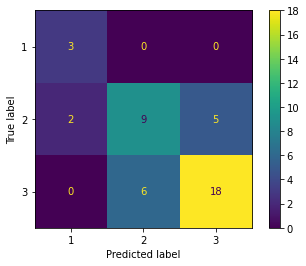

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_best, X_test, y_test)

## Joblib 

Exporter le modèle 

In [59]:
import joblib

filename = 'KNN_Final'

joblib.dump(classifier, filename)

nom_du_modele = joblib.load(filename)

In [73]:
%run Test_knn.py 

Question 1 :
Quelle importance accordez-vous au succès ?

(a)Une importance moyenne.
(b)Une très grande importance.
(c)Le succès ne me préoccupe pas beaucoup.
a

Question 2 :
Vous est-il déjà arrivé de prendre des jours de congé parce que vous étiez stressé(e) ?

(a)Une ou deux fois.
(b)Plus de deux fois.
(c)Jamais.
b

Question 3 :
Vous considère-t-on comme une personne sachant conserver son sang froid en période de crise ?

(a)Parfois, mais ceux qui arrivent à garder la tête froide en période de crise n’ont généralement pas saisi la gravité de la situation.
(b)Pas vraiment.
(c)Oui, je pense être à juste titre perçu(e) ainsi.
c

Question 4 :
Parmi les propositions suivantes, laquelle est la plus à même de vous détendre et de réduire votre stress après une journée particulièrement éprouvante ?

(a)Quelques heures de sommeil dans ma chaise longue préférée.
(b)Une bonne rasade de whiskey ou d’un autre alcool.
(c)Une barre chocolatée.
c

Question 5 :
Les délais vous stimulent-ils ?

(a)Non